In [32]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [33]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [34]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [35]:
def get_ohlc(ativo, timeframe, n=5):
    ativo = mt5.copy_rates_from_pos(ativo, timeframe, 0, n)
    ativo = pd.DataFrame(ativo)
    ativo['time'] = pd.to_datetime(ativo['time'], unit='s')
    ativo.set_index('time', inplace=True)
    return ativo

In [195]:
df_analise = get_ohlc('MAPT4', mt5.TIMEFRAME_D1, 500)

In [196]:
df_analise

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2010-05-18,13.40,13.40,13.00,13.00,3,1,30
2010-05-24,13.00,13.00,13.00,13.00,2,1,70
2010-05-26,16.60,16.60,16.60,16.60,1,1,10
2010-05-28,10.10,16.40,10.10,16.40,2,1,20
2010-06-07,11.80,13.00,11.80,13.00,2,1,20
...,...,...,...,...,...,...,...
2021-12-23,26.00,26.00,21.60,21.60,8,1,1000
2021-12-27,25.00,25.00,25.00,25.00,2,1,200
2021-12-29,26.50,27.00,25.99,27.00,5,1,500


In [197]:
df_analise['M20'] = ta.sma(df_analise['close'], length=20)
df_analise['M50'] = ta.sma(df_analise['close'], length=50)
df_analise['M200'] = ta.sma(df_analise['close'], length=200)

In [198]:
#inicialmente teste com 1000ticks
df_analise['Dist20'] = df_analise['close'] - df_analise['M20'] 
df_analise['Dist50'] = df_analise['close'] - df_analise['M50']
df_analise['Dist200'] = df_analise['close'] - df_analise['M200']

In [199]:
df = df_analise
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2010-05-18,13.40,13.40,13.00,13.00,3,1,30,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-24,13.00,13.00,13.00,13.00,2,1,70,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-26,16.60,16.60,16.60,16.60,1,1,10,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-28,10.10,16.40,10.10,16.40,2,1,20,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-07,11.80,13.00,11.80,13.00,2,1,20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,26.00,26.00,21.60,21.60,8,1,1000,41.0285,42.5524,32.24000,-19.4285,-20.9524,-10.64000
2021-12-27,25.00,25.00,25.00,25.00,2,1,200,40.2785,42.1822,32.33750,-15.2785,-17.1822,-7.33750
2021-12-29,26.50,27.00,25.99,27.00,5,1,500,39.4785,41.8124,32.44650,-12.4785,-14.8124,-5.44650


In [200]:
df = df[df['real_volume'] > 0]
df

,open,high,low,close,tick_volume,spread,real_volume,M20,M50,M200,Dist20,Dist50,Dist200
time,,,,,,,,,,,,,
2010-05-18,13.40,13.40,13.00,13.00,3,1,30,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-24,13.00,13.00,13.00,13.00,2,1,70,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-26,16.60,16.60,16.60,16.60,1,1,10,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-28,10.10,16.40,10.10,16.40,2,1,20,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-07,11.80,13.00,11.80,13.00,2,1,20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,26.00,26.00,21.60,21.60,8,1,1000,41.0285,42.5524,32.24000,-19.4285,-20.9524,-10.64000
2021-12-27,25.00,25.00,25.00,25.00,2,1,200,40.2785,42.1822,32.33750,-15.2785,-17.1822,-7.33750
2021-12-29,26.50,27.00,25.99,27.00,5,1,500,39.4785,41.8124,32.44650,-12.4785,-14.8124,-5.44650


In [201]:
def percentil(data, up=90, down=10):
    x = data
    x = x.dropna()
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

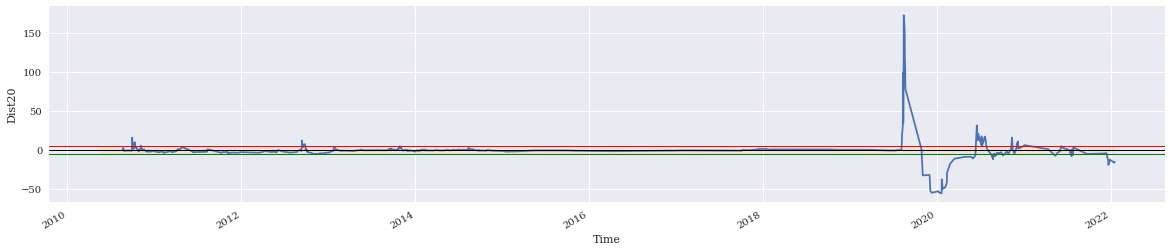

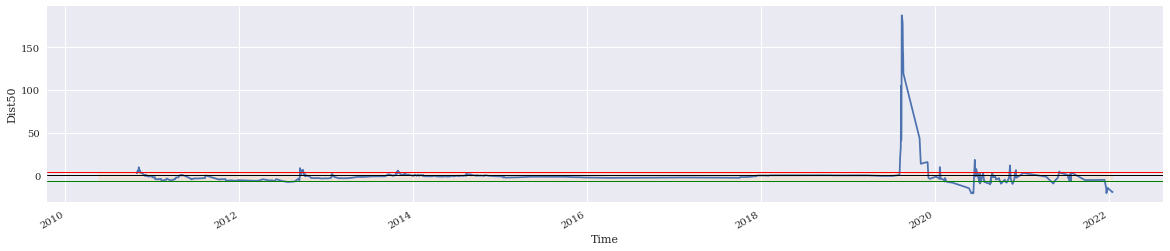

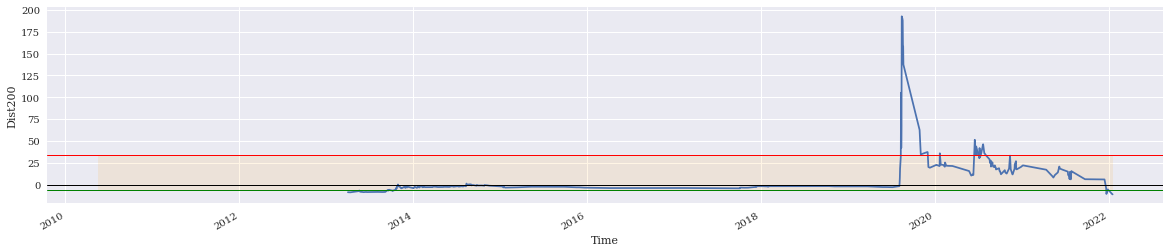

In [202]:
plt.rcParams['figure.figsize'] = (20,4)
# parametros percentil
up = 90
down = 10

per_m20 = percentil(df['Dist20'], up, down)
ax = df['Dist20'].plot()
ax.fill_between(df.index, per_m20[0], per_m20[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m20[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m20[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist20')
plt.show()

per_m50 = percentil(df['Dist50'], up, down)
ax = df['Dist50'].plot()
ax.fill_between(df.index, per_m50[0], per_m50[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m50[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
#plt.axhline(10.0, color="grey", lw=1.0)
plt.axhline(per_m50[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist50')
plt.show()

per_m200 = percentil(df['Dist200'], up, down)
ax = df['Dist200'].plot()
ax.fill_between(df.index, per_m200[0], per_m200[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_m200[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_m200[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist200')
plt.show()

In [203]:
df['Dist20'].describe()

count    481.000000
mean       0.362475
std       18.575217
min      -55.842000
25%       -2.495000
50%       -0.620000
75%        0.850000
max      172.692500
Name: Dist20, dtype: float64

In [204]:
df['Dist50'].describe()

count    451.000000
mean       1.128375
std       20.394942
min      -21.184400
25%       -3.570000
50%       -1.196000
75%        0.357400
max      187.517200
Name: Dist50, dtype: float64

In [205]:
df['Dist200'].describe()

count    301.000000
mean      10.131189
std       28.141373
min      -11.100550
25%       -3.036000
50%       -1.693000
75%       18.343900
max      192.744300
Name: Dist200, dtype: float64